# PIA Proyecto Final: CNN
# AAarón Tamez Barrón
# 202274
# 20/11/**2024**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contenido en '/content/drive/MyDrive/Animals':
['animals']
Contenido en '/content/drive/MyDrive/Animals/animals':
['translate.py', 'raw-img']
Archivo encontrado: /content/drive/MyDrive/Animals/animals/translate.py
Contenido de translate.py:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}

Archivos encontrados en '/content/drive/MyDrive/Animals/animals/raw-img':
Se encontraron 26304 imágenes.


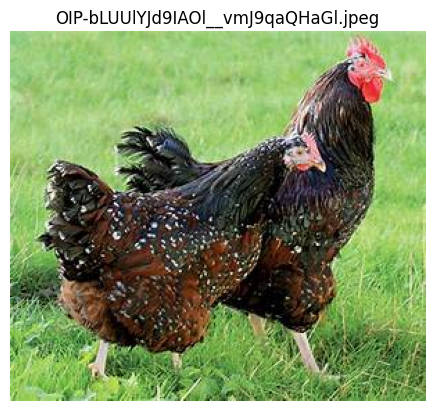

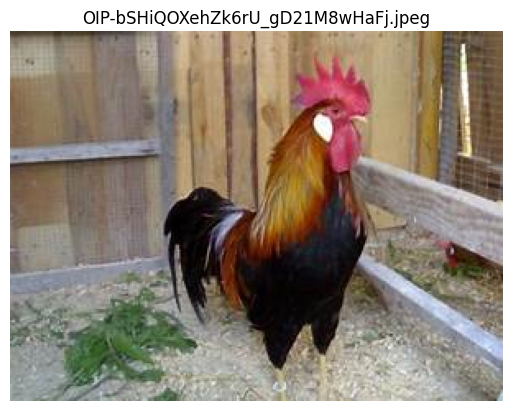

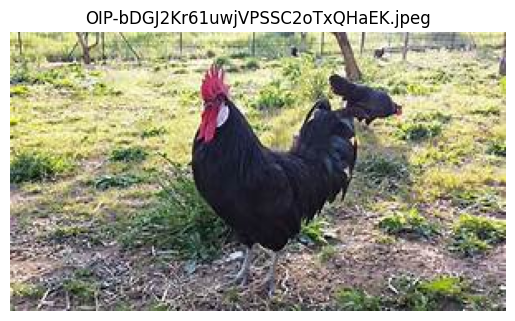

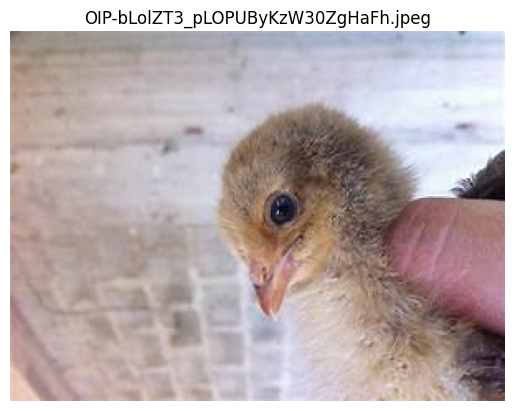

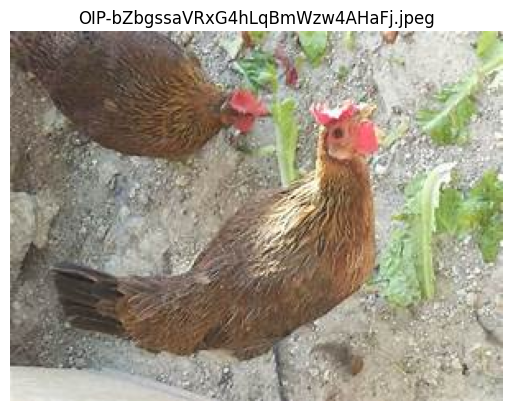

In [ ]:
#Comprobando la ejecucion del conjunto de datos guardados en el OneDrive
from google.colab import drive
drive.mount('/content/drive')

import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = '/content/drive/MyDrive/Animals'

print(f"Contenido en '{dataset_path}':")
print(os.listdir(dataset_path))

animals_path = os.path.join(dataset_path, 'animals')

print(f"Contenido en '{animals_path}':")
print(os.listdir(animals_path))

translate_file = os.path.join(animals_path, 'translate.py')
if os.path.exists(translate_file):
    print(f"Archivo encontrado: {translate_file}")
    with open(translate_file, 'r') as file:
        content = file.read()
        print("Contenido de translate.py:")
        print(content)
else:
    print("translate.py no encontrado.")

raw_img_folder = os.path.join(animals_path, 'raw-img')
if os.path.exists(raw_img_folder):
    print(f"Archivos encontrados en '{raw_img_folder}':")

    image_files = glob.glob(os.path.join(raw_img_folder, '**', '*.*'), recursive=True)
    image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

    print(f"Se encontraron {len(image_files)} imágenes.")

    for img_path in image_files[:5]:
        try:
            img = Image.open(img_path)
            plt.imshow(img)
            plt.title(os.path.basename(img_path))
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Error al abrir {img_path}: {e}")
else:
    print("Carpeta 'raw-img' no encontrada.")


In [ ]:
#Montar Google Drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
dataset_path = "/content/drive/MyDrive/Animals"


Mounted at /content/drive


In [ ]:
# Importar Librerías y Preparar el Dataset
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 21044 images belonging to 1 classes.
Found 5260 images belonging to 1 classes.


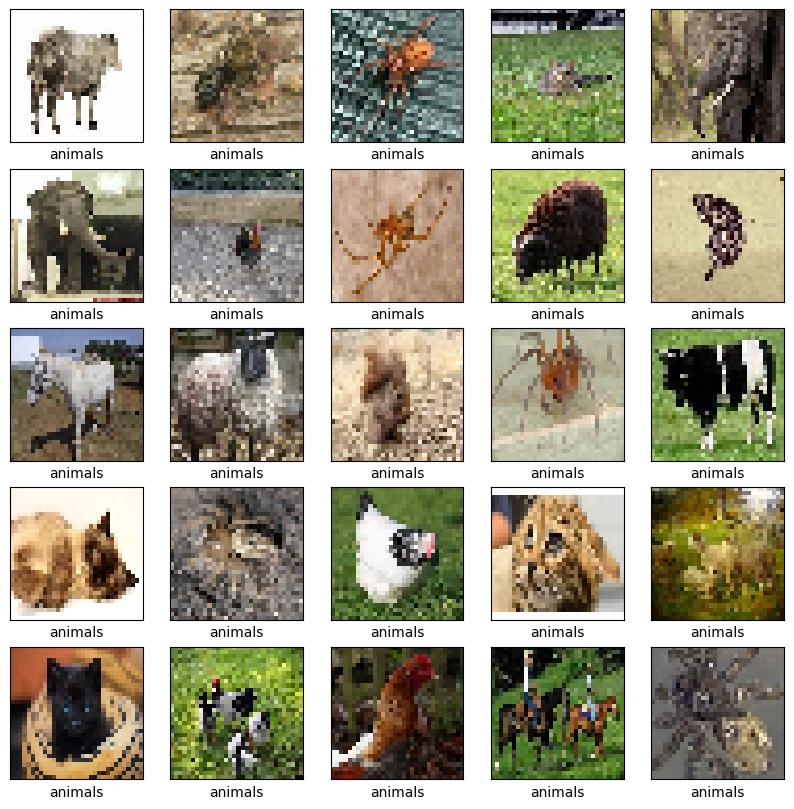

In [ ]:
#Visualización de Imágenes
class_names = list(train_data.class_indices.keys())

plt.figure(figsize=(10, 10))
for i in range(25):
    img, label = next(train_data)
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[0])
    plt.xlabel(class_names[int(label[0])])
plt.show()



In [ ]:
#Definir modelo
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(class_names)))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,985 (476.50 KB)

 Trainable params: 121,985 (476.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Comprobar y probar modelo
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


658/658 ━━━━━━━━━━━━━━━━━━━━ 4803s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 142s 214ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 141s 213ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 143s 214ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 141s 213ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 165s 248ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 142s 214ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
658/658 ━━━━━━━━━━━━━━

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 82ms/step - accuracy: 0.3440 - loss: 1.7904 - val_accuracy: 0.5283 - val_loss: 1.3073
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step - accuracy: 0.5555 - loss: 1.2414 - val_accuracy: 0.5759 - val_loss: 1.1701
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.6246 - loss: 1.0680 - val_accuracy: 0.6562 - val_loss: 0.9802
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.6669 - loss: 0.9474 - val_accuracy: 0.6626 - val_loss: 0.9665
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.7008 - loss: 0.8549 - val_accuracy: 0.6821 - val_loss: 0.9109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


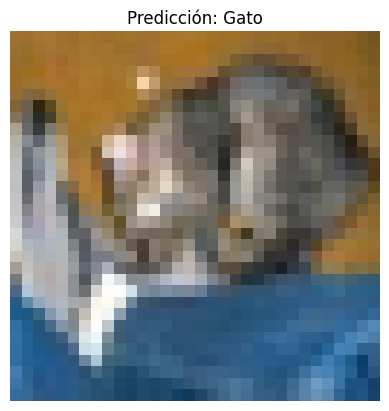

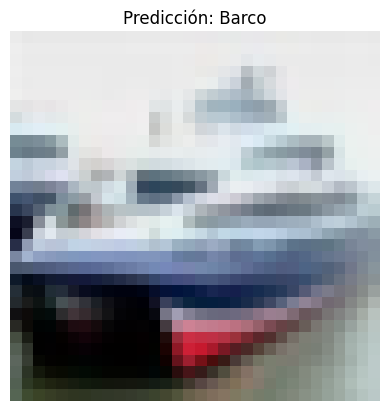

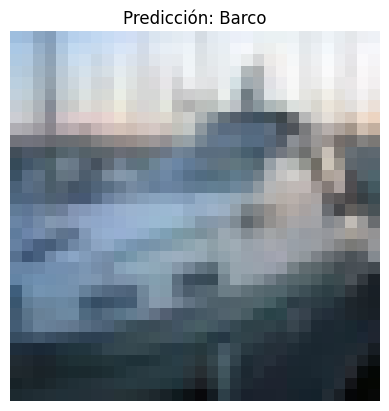

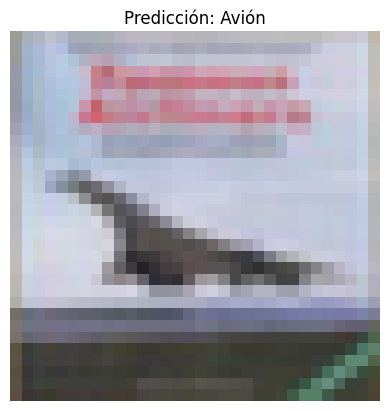

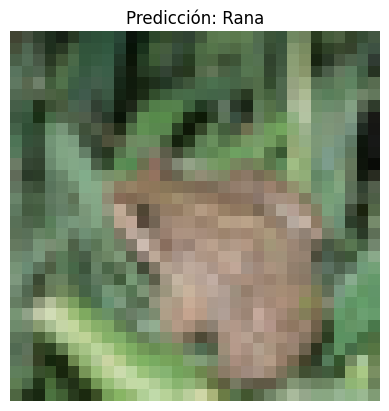

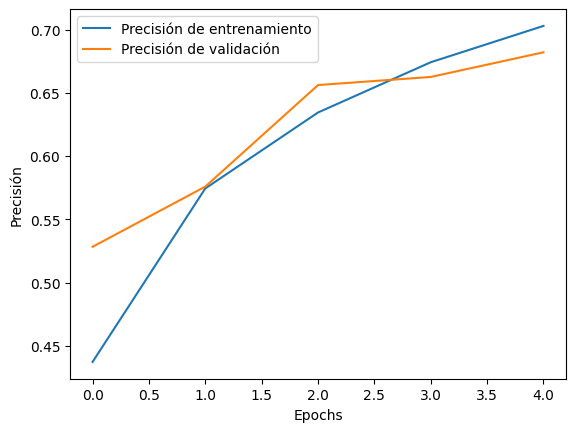

In [26]:
#5 preubas del modelo
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

predictions = model.predict(test_images[:5])

class_names = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

for i in range(5):
    plt.imshow(test_images[i])
    plt.title(f"Predicción: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()

history = history.history

plt.plot(history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()
plt.show()
